### Neural style transfer

This tutorial uses deep learning to compose one image in the style of another image (ever wish you could paint like Picasso or Van Gogh?). Known as *neural style transfer* is an optimization technique used to take two images—a *content* image and a *style reference* image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image. This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style reference image. These statistics are extracted from the images using a convolutional network.

### Fonts

In [10]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Import and configure modules

In [11]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools
import tensorflow_hub as hub
import time

### Load Hub Model

In [12]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

### Tensor to Image

In [13]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

### Visualize the input
Define a function to load an image and limit its maximum dimension to 512 pixels.

In [14]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

### Create a simple function to display an image

In [47]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

### Load the Style and content images

In [48]:
content_image = load_img('../../data/test_images/jari.jpg');
style_image_1 = load_img('../../data/test_images/rousseau.png');
style_image_2 = load_img('../../data/test_images/vangogh.png');
style_image_3 = load_img('../../data/test_images/warhol.png');
style_image_4 = load_img('../../data/test_images/osgemeos.png');
style_image_5 = load_img('../../data/test_images/monet.png');

### Stylize Helper Function

In [49]:
def stylize(content_image,style_image):
    
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    stylized_image = tensor_to_image(stylized_image) 
    content_image = tensor_to_image(content_image)
    style_image = tensor_to_image(style_image)
    (xdim,ydim) = content_image.size
    style_image = style_image.resize((xdim,ydim))
    return stylized_image,content_image,style_image

### Stylize the content image

In [50]:
stylized_image_1,tmp,style_image_1 = stylize(content_image,style_image_1)
stylized_image_2,tmp,style_image_2 = stylize(content_image,style_image_2)
stylized_image_3,tmp,style_image_3 = stylize(content_image,style_image_3)
stylized_image_4,tmp,style_image_4 = stylize(content_image,style_image_4)
stylized_image_5,tmp,style_image_5 = stylize(content_image,style_image_5)
content_image = tensor_to_image(content_image)

### Visualize

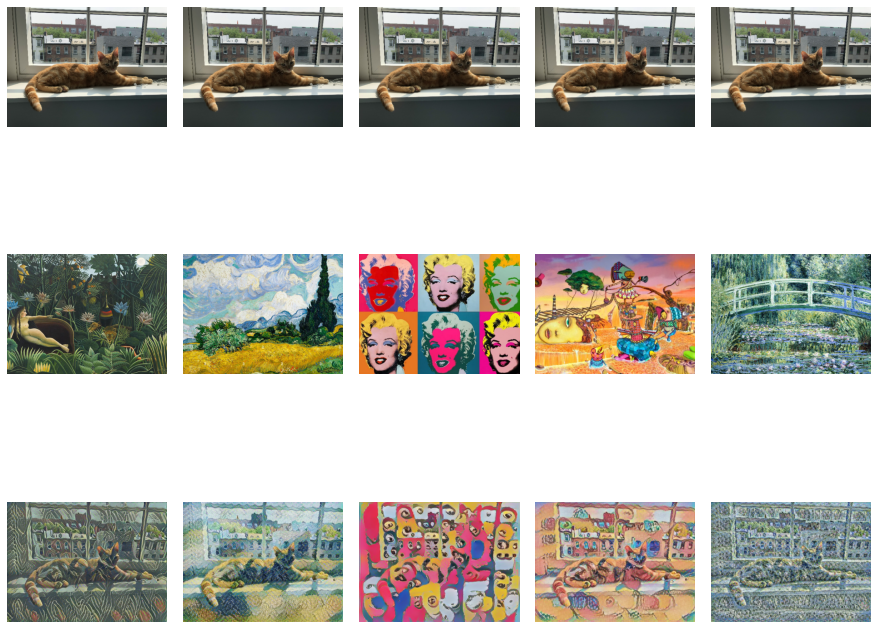

In [61]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(left=0.0,bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.1)
plt.subplot(3,5,1)
plt.imshow(content_image)
plt.axis('off');
plt.subplot(3,5,6)
plt.imshow(style_image_1);
plt.axis('off');
plt.subplot(3,5,11)
plt.imshow(stylized_image_1);
plt.axis('off');

plt.subplot(3,5,2)
plt.imshow(content_image)
plt.axis('off');
plt.subplot(3,5,7)
plt.imshow(style_image_2);
plt.axis('off');
plt.subplot(3,5,12)
plt.imshow(stylized_image_2);
plt.axis('off');

plt.subplot(3,5,3)
plt.imshow(content_image)
plt.axis('off');
plt.subplot(3,5,8)
plt.imshow(style_image_3);
plt.axis('off');
plt.subplot(3,5,13)
plt.imshow(stylized_image_3);
plt.axis('off');

plt.subplot(3,5,4)
plt.imshow(content_image)
plt.axis('off');
plt.subplot(3,5,9)
plt.imshow(style_image_4);
plt.axis('off');
plt.subplot(3,5,14)
plt.imshow(stylized_image_4);
plt.axis('off');

plt.subplot(3,5,5)
plt.imshow(content_image)
plt.axis('off');
plt.subplot(3,5,10)
plt.imshow(style_image_5);
plt.axis('off');
plt.subplot(3,5,15)
plt.imshow(stylized_image_5);
plt.axis('off');
plt.savefig('../../assets/matplotlib/29-style-transfer.png', dpi=300,bbox_inches="tight")